# Skillfactory Project 2: Math Score prediction(EDA)

## Content

[1. General information](#general-information)

[2. Importing libraries](#label2)

[3. Dataset reading](#label3)

[4. Function used on this EDA](#label4)

[5. Part 1. Dataset overview](#label5)

[6. Part 2. Data exploration](#label6)

[7. Part 3. Correlation analysis](#label7)

[8. Part 4. Categorical variables analysis](#label8)

[9. Part 5. Conclusion](#label9)








## General information<a id='general-information'></a>

This exploratory data analysis is made as a learning project for Data Science specialization (Skillfactory School).

The purpose is to explore and prepare the dataset for future modeling.
The dataset contains information about students and their math examination results.

Future model based on this data is going to predict math score of every student.
Global Purpose of the model : monitoring how life conditions influence exam success
and detect the students being in a group of high risk in early stages.

## Importing libraries
<a id='label2'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

## Dataset reading
<a id='label3'></a>   

In [2]:
stud_math_source = pd.read_csv(r'C:\Users\ykcyc\SF\SF_unit2/stud_math.csv')
print(
    f'Dataset has {stud_math_source.shape[0]} rows and {stud_math_source.shape[1]} columns.')
stud_math = stud_math_source.copy()

Dataset has 395 rows and 30 columns.


##  Functions used in this EDA
<a id='label4'></a>

In [3]:
# function outliers search


def outliers_search(column, num_only=0, df=stud_math):

    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75-perc25
    l = perc25 - 1.5*IQR
    h = perc75 + 1.5*IQR
    if num_only == 1:
        return (df[(~df[column].between(l, h)) | (df[column].isna())].shape[0])

    else:
        return(df[(~df[column].between(l, h)) | (df[column].isna())])

# function for quick analysis of dataset


def qa(df, row=None):

    qa_df = pd.DataFrame(columns=['feature', 'type', 'unique_value',
                                  'null_value', 'null_value_percent',
                                  'non_null_value', 'mode_or_median', 'outliers_num'])
    qa_df.feature = df.columns
    qa_df.type = qa_df.feature.apply(
        lambda x: 'quantitative' if x in quantitative else
        ('ordinal' if x in ordinal else 'nominal'))
    qa_df.unique_value = qa_df.feature.apply(lambda x: df[x].nunique())
    qa_df.non_null_value = qa_df.feature.apply(lambda x: df[x].count())
    qa_df.null_value = qa_df.feature.apply(
        lambda x: len(df[x]) - df[x].count())
    qa_df.null_value_percent = round(
        qa_df.null_value / (qa_df.null_value + qa_df.non_null_value)*100)
    qa_df.mode_or_median = qa_df.feature.apply(
        lambda x: df[x].median() if x in quantitative else df[x].mode().iloc[0])
    qa_df.outliers_num = qa_df.feature.apply(
        lambda x: outliers_search(x, 1) if x not in nominal else None)
    if row == None:
        return qa_df
    else:
        return qa_df[qa_df.feature == row]


# function to perform boxplotes

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# function for Student's t-distribution
def get_stat_dif(column, df=stud_math):

    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Bonferoni amendment
            return column
            break
# function for vizualize categoricals


def categorical_viz(column):
    display(pd.DataFrame(stud_math[column].value_counts(dropna=False)))
    display(stud_math[[column, 'score']].groupby(by=[column]).mean())
    plt.figure(figsize=(6, 6))
    col_values = stud_math[column].value_counts(normalize=True).sort_values()
    graph = sns.countplot(stud_math[column], order=col_values.index)

    for bar, value in zip(graph.axes.patches, col_values):
        x_text = bar.get_x() + bar.get_width() / 2
        y_text = bar.get_height()
        graph.axes.annotate('{}%'.format(round(100 * value)), (x_text, y_text), ha='center', va='center',
                            fontsize=11, color='black', rotation=0, xytext=(0, 10), textcoords='offset points')
    plt.show()
    display(qa(stud_math, column))

# function for replace na values with mode


def fill_miss_with_mode(column):
    mode = stud_math[column].mode()[0]
    stud_math[column] = stud_math[column].apply(
        lambda x: mode if pd.isna(x) else x)

# function for replace na values with exact value


def fill_miss_with_value(column, value):
    stud_math[column] = stud_math[column].apply(
        lambda x: value if pd.isna(x) else x)

## Part 1.  Dataset overview
<a id='label5'></a>

Dataset contains informations about 395 students and 30 features.
Lets look at the first records of dataset.

In [4]:
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
stud_math.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,395,395,395.000000,378,368,350,392.000000,371.000000,376,359,...,388.000000,375,361,364,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,295,261,314,NaN,NaN,133,197,...,NaN,356,305,240,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.750000,2.614555,NaN,NaN,...,-6.115979,NaN,NaN,NaN,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.098127,2.228732,NaN,NaN,...,2.526235,NaN,NaN,NaN,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,-12.000000,NaN,NaN,NaN,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,-6.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,-3.000000,NaN,NaN,NaN,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000


In [6]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Next it is necessary to define the types of variables in dataset.
Despite many columns have data types float and integer there are only 3 which we can actually define as quantitative:age, absences and score (our target variable). 
Other float and int are actually categorical can be defined as ordinal. Columns with dtype object are all nominal.
We create some lists and contain variables to them for further convenient use.

In [7]:
quantitative = [stud_math.columns[i] for i in [2, 28, 29]]
nominal = stud_math.columns[stud_math.dtypes == object].tolist()
ordinal = stud_math.columns[stud_math.dtypes != object].tolist()[1:-2]

print(
    f'Quantitative variables : {quantitative}')
print(
    f'Nominal variables: {nominal}')
print(
    f'Ordinal variables: {ordinal}')

Quantitative variables : ['age', 'absences', 'score']
Nominal variables: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Ordinal variables: ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel', 'freetime', 'goout', 'health']


In [8]:
qa(stud_math)

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
0,school,nominal,2,0,0.0,395,GP,NaN
1,sex,nominal,2,0,0.0,395,F,NaN
2,age,quantitative,8,0,0.0,395,17,1.0
3,address,nominal,2,17,4.0,378,U,NaN
4,famsize,nominal,2,27,7.0,368,GT3,NaN
5,Pstatus,nominal,2,45,11.0,350,T,NaN
6,Medu,ordinal,5,3,1.0,392,4,3.0
7,Fedu,ordinal,6,24,6.0,371,2,27.0
8,Mjob,nominal,5,19,5.0,376,other,NaN
9,Fjob,nominal,5,36,9.0,359,other,NaN


Summary for part 1.

1. Dataset has 395 objects and 30 features: 3 quantitative, 17 nominal, 10 ordinal.
As we can see both nominals and ordinals have not a big range of values.


2. There are only 3 features without missing values, but in the most of columns the percentage of them are no more than 10%. The features with maximal percent of missing values are Pstatus, famsup and paid.


3. Also for some numeric feature we see big number of outliers. Some of them are close to the number of missing values and somewhere the reason of it is not clear. We are not going to rely on statistic blindly and going to explore the features properly.


4. The general quality of dataset is satisfiable at first sight


## Part 2.  Data exploration
<a id='label6'></a>

On this stage we are going to look at all columns in dataset and to handle with missing values where it is possible and reasonable.

### school

,school
GP,349
MS,46


,score
school,
GP,52.630814
MS,49.444444


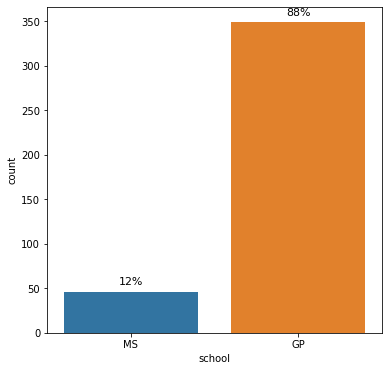

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
0,school,nominal,2,0,0.0,395,GP,NaN


In [9]:
categorical_viz('school')

There are only two schools in dataset. The most of students study in GP. The mean score is almost equal. 

### sex

,sex
F,208
M,187


,score
sex,
F,50.098039
M,54.648649


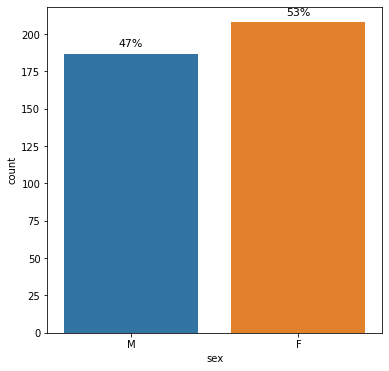

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
1,sex,nominal,2,0,0.0,395,F,NaN


In [10]:
categorical_viz('sex')

Distribution of students between sex groups are almost equal. As for mean score male students are slightly better.But the difference is not big so we can conclude that gender and school don't have a big influence final score.

### age

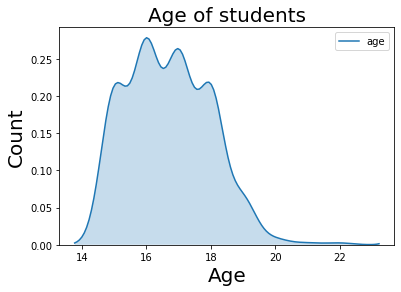

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
2,age,quantitative,8,0,0.0,395,17,1.0


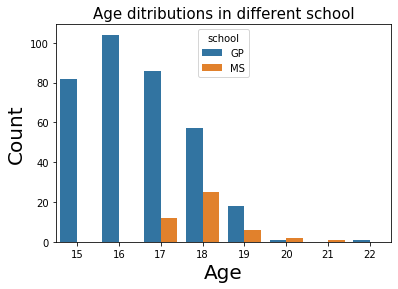

In [11]:
b = sns.kdeplot(stud_math['age'], shade=True)
b.axes.set_title('Age of students', fontsize=20)
b.set_xlabel('Age', fontsize=20)
b.set_ylabel('Count', fontsize=20)
plt.show()

display(qa(stud_math, 'age'))

b = sns.countplot('age', hue='school', data=stud_math)
b.axes.set_title('Age ditributions in different school', fontsize=15)
b.set_xlabel("Age", fontsize=20)
b.set_ylabel("Count", fontsize=20)
plt.show()

The most of students are between 16 and 17. What is interesting in MS School the most of students are 18, and there are actually nobody below the age 17. Maybe schools have different age politics, but as we saw analyzing schools above - that doesn't matter much.

There is one outlier : 22 years. But it doesn't contradict with dataset description. Maybe this person had his reasons to pass the exams later. We will leave it as it is.


### address

In [12]:
display(stud_math.groupby(['school', 'address']).traveltime.mean())
display(stud_math.groupby(['school', 'address']).address.count())
display(stud_math[stud_math.reason == 'home'].groupby(
    ['school', 'address']).address.count())
stud_math[stud_math.address.isnull()][['school', 'address',
                                       'reason', 'traveltime']]

school  address
GP      R          1.672727
        U          1.319231
MS      R          2.190476
        U          1.529412
Name: traveltime, dtype: float64

school  address
GP      R           60
        U          277
MS      R           23
        U           18
Name: address, dtype: int64

school  address
GP      R           8
        U          81
MS      R           3
        U           4
Name: address, dtype: int64

,school,address,reason,traveltime
6,GP,NaN,home,1.0
52,GP,NaN,other,2.0
75,GP,NaN,home,1.0
92,GP,NaN,home,1.0
96,GP,NaN,reputation,2.0
159,GP,NaN,course,1.0
168,GP,NaN,home,1.0
241,GP,NaN,course,NaN
254,GP,NaN,course,1.0
270,GP,NaN,home,1.0


Here are we have to handle with 17 missing values. There are some connected features that better to explore together : address, traveltime, reason. And we will look at them in each school separately.
The average traveltime for urban students is less than for rural.
As for reasons the most of people who choose the school GP close to home live in urban area.
We can conclude that both schools are situated in urban area.  
Lets look at objects with missed address:

For the students from GP traveltime = 1 is more typical - suppose they are from urban.
Traveltime = 2 is bigger than average even for rural, so suppose that they are from rural area.

For the students from MS travel time is much bigger than average. But they mostly had "home" as reason. There is an idea that they live so far that MS school the closest one they can reach.
So suppose they all are from rural area. 

   
    1. For school GP fill na-values with the value = U
    2. For school MS if traveltime = R
    
 

In [13]:
stud_math.loc[(pd.isnull(stud_math['address'])), 'address']\
    = stud_math.school.apply(lambda x: 'R' if x == 'MS' else 'U')

,address
U,307
R,88


,score
address,
R,47.816092
U,53.543046


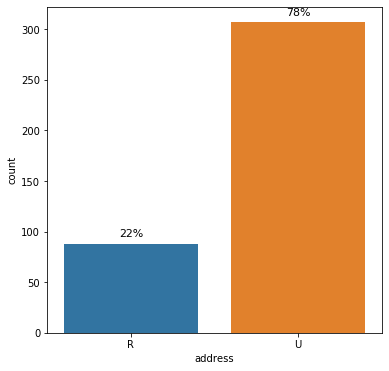

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
3,address,nominal,2,0,0.0,395,U,NaN


In [14]:
categorical_viz('address')

We don't have misses any more. We see that urban students perform slightly better.

### famsize

In [15]:
fill_miss_with_mode('famsize')

More than 70% of students live in bigger families. There are 27 na values.
Lets fill them with mode.

,famsize
GT3,288
LE3,107


,score
famsize,
GT3,51.347518
LE3,54.672897


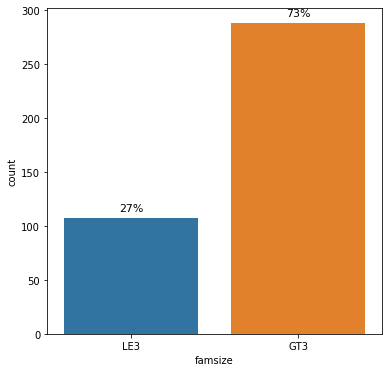

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
4,famsize,nominal,2,0,0.0,395,GT3,NaN


In [16]:
categorical_viz('famsize')

### Pstatus

As we already mentioned this feature has the biggest percent of na values.

I don't like the idea to fill the missing values with most common value because:
    1) afraid to spoil the dataset in feature that as i suppose can be meaningful (It would be interesting to explore the connection between family conditions and study success.)
    2) think that there are may be reasons for not giving this information.
So i would choose the way to add the third value : N : "The information is not given"

In [17]:
stud_math.loc[(pd.isnull(stud_math['Pstatus'])), 'Pstatus'] = 'N'

,Pstatus
T,314
N,45
A,36


,score
Pstatus,
A,55.138889
N,53.777778
T,51.704545


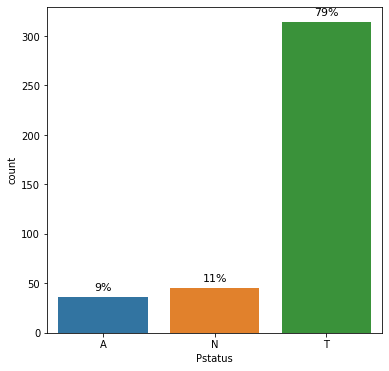

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
5,Pstatus,nominal,3,0,0.0,395,T,NaN


In [18]:
categorical_viz('Pstatus')

### Medu and Fedu

In [19]:
qa(stud_math[['Fedu', 'Medu']])

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
0,Fedu,ordinal,6,24,6.0,371,2.0,27
1,Medu,ordinal,5,3,1.0,392,4.0,3


Let's explore feature connected with parents education together.
The column Fedu is more difficult as it 
1. has 24 na-values 
2. and 27 outliers (guess that it is 24 na-value and 3 connected with something else). 
3. One more strange thing is that number of unique values has 6 when it must be 5 according to dataset info.
So look at Fedu first

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

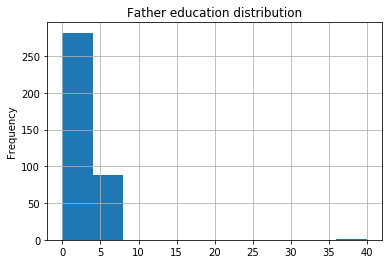

In [20]:
stud_math['Fedu'].plot(kind='hist', grid=True,
                       title='Father education distribution')
stud_math['Fedu'].value_counts()

There is one value = 40, though the range of values is from 0 to 4 , that is probably mistake in data collection. The most probable is that it must be 4. Let's make a replace.

In [21]:
stud_math.loc[stud_math['Fedu'] == 40, 'Fedu'] = 4

Next we can explore the connections between parents mothers and fathers education.
Exploring the graphs below we can conclude:
   1. There are no objects in dataset where we have both parents education missed. Good news.
   2. The higher level of mother's education the higher level of father's
   3. We can use this information to fill the na-values
   4. There are 2 outliers with value = 0 in Fedu. There are 2 fathers that have low level of education. And one of them in a couple with high-educated mother. It is only one exclusion from conclusion №2 and it is not against the common sense so we don't drop them.
  

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,...,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,...,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


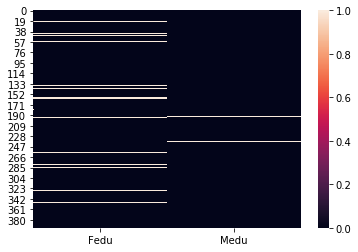

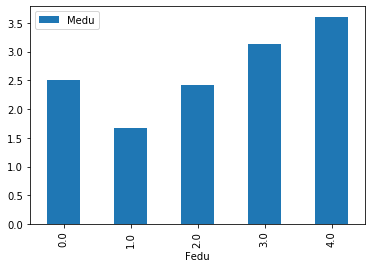

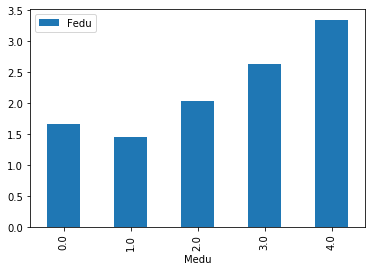

In [22]:
sns.heatmap(stud_math[['Fedu', 'Medu']].isnull())
stud_math.pivot_table(values=['Medu'],
                      index='Fedu',
                      aggfunc='mean').plot(kind='bar')
stud_math.pivot_table(values=['Fedu'],
                      index='Medu',
                      aggfunc='mean').plot(kind='bar')
stud_math['Fedu'].dropna()
outliers_search('Fedu', num_only=0, df=stud_math[~stud_math.Fedu.isnull()])

After this analysis we can complete the missing values in Fedu and Medu. 

In [23]:
stud_math.loc[pd.isnull(stud_math['Medu']), 'Medu'] = stud_math['Fedu']
stud_math.loc[pd.isnull(stud_math['Fedu']), 'Fedu'] = stud_math['Medu']

,Fedu
2.0,110
3.0,103
4.0,99
1.0,81
0.0,2


,score
Fedu,
0.0,65.000000
1.0,45.897436
2.0,52.018349
3.0,53.217822
4.0,56.313131


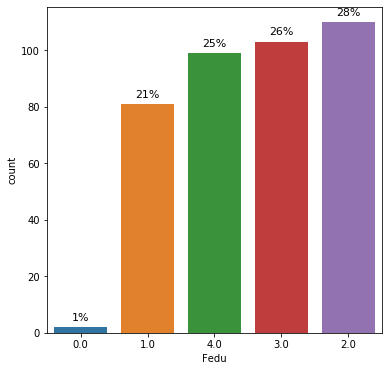

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
7,Fedu,ordinal,5,0,0.0,395,2,0.0


In [24]:
categorical_viz('Fedu')

,Medu
4.0,131
2.0,103
3.0,98
1.0,60
0.0,3


,score
Medu,
0.0,65.000000
1.0,42.894737
2.0,49.108911
3.0,51.804124
4.0,58.816794


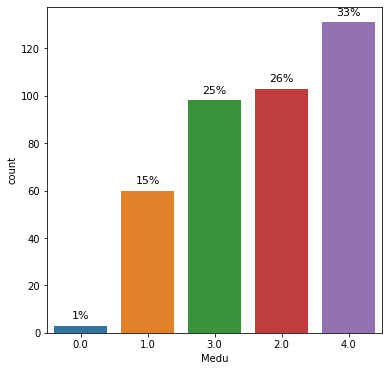

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
6,Medu,ordinal,5,0,0.0,395,4,0.0


In [25]:
categorical_viz('Medu')

After we completed both features let's look at their influence to target variable.
It looks like the higher parents education the better exam performance.

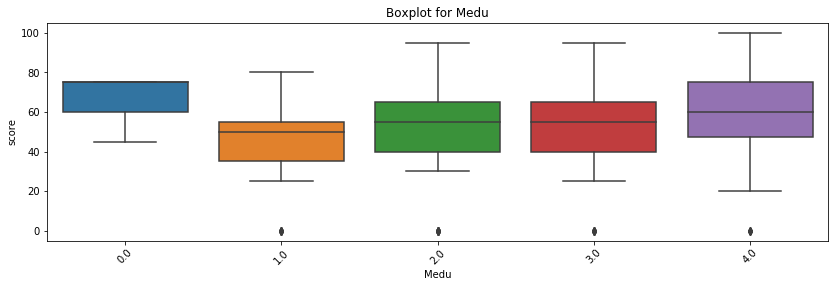

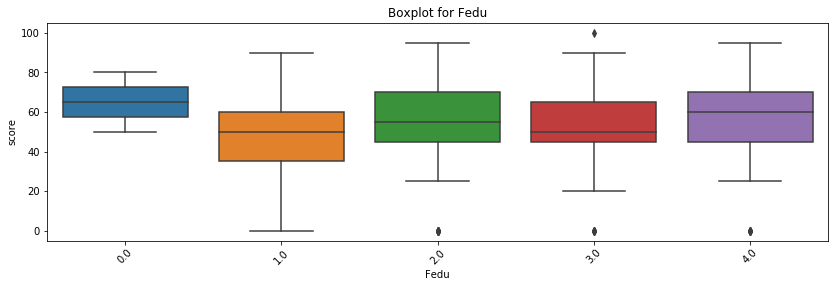

In [26]:
get_boxplot('Medu')
get_boxplot('Fedu')

### Mjob and Fjob

,Mjob,Fjob,total,total_%
other,133,197,330,42.0
services,98,102,200,25.0
at_home,58,16,74,9.0
teacher,55,29,84,11.0
health,32,15,47,6.0
NaN,19,36,55,7.0


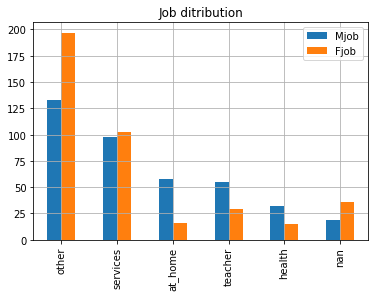

In [27]:
jobs = pd.concat([pd.DataFrame(stud_math['Mjob'].value_counts(dropna=False)),
                  pd.DataFrame(stud_math['Fjob'].value_counts(dropna=False))], axis=1)
jobs['total'] = jobs['Mjob']+jobs['Fjob']
jobs['total_%'] = round(jobs['total']/jobs['total'].sum()*100)
display(jobs)
jobs[['Mjob', 'Fjob']].plot(kind='bar', grid=True, title='Job ditribution')

We see that the most of parents have job from the category 'other', the next one is 'services'.
Let's fill na-values with mode = 'other'

In [28]:
fill_miss_with_mode('Mjob')
fill_miss_with_mode('Fjob')

Now look at boxplotes and table with mean scores. we see that children of teachers and health jobs perform better. Maybe there are some connection between having teacher in the family and success in exams? Let's check this hypothetic later (after target variable exploration)

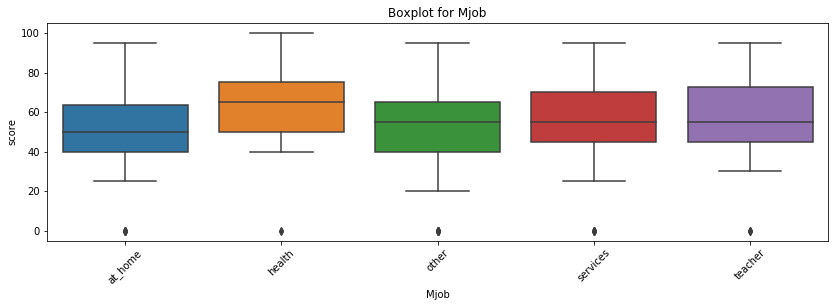

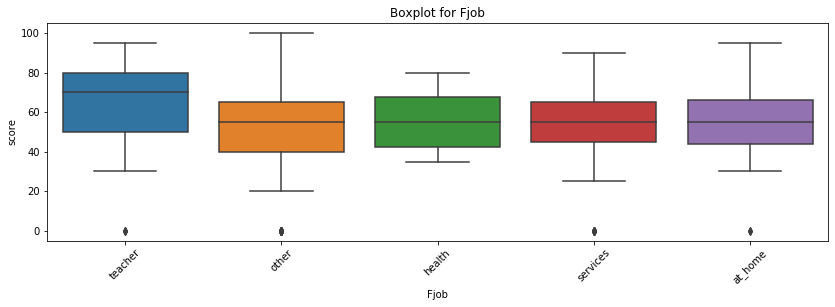

,score,score
at_home,51.875000,45.689655
health,55.666667,60.625000
other,51.891304,50.273973
services,50.454545,54.744898
teacher,59.827586,55.181818


In [29]:
get_boxplot('Mjob')
get_boxplot('Fjob')
pd.concat([stud_math[['Fjob', 'score']].groupby(by=['Fjob']).mean(),
           stud_math[['Mjob', 'score']].groupby(by=['Mjob']).mean()], axis=1)

### reason

We have 17 missing values in this column. 

Text(0, 0.5, 'Number of Students')

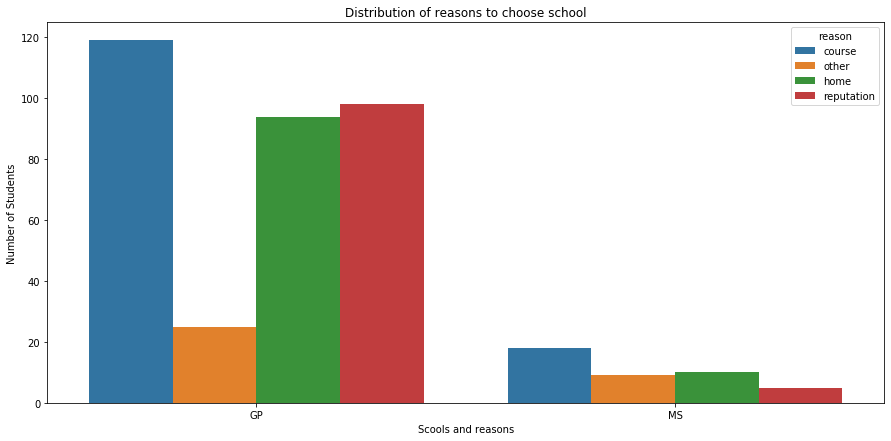

In [30]:
plt.figure(figsize=(15, 7))
d = sns.countplot(stud_math['school'], hue=stud_math['reason'])
d.set_title("Distribution of reasons to choose school")
d.set_xlabel("Scools and reasons")
d.set_ylabel("Number of Students")

Exploring each school separately we see that reasons differ: for GP reputation matters more, while for MS closeness to home. But for both the main reason is 'course'. So fiil na-values with mode.


In [31]:
fill_miss_with_mode('reason')
qa(stud_math, 'reason')

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
10,reason,nominal,4,0,0.0,395,course,NaN


### guardian

,guardian
mother,250
father,86
NaN,31
other,28


,score
guardian,
father,53.430233
mother,52.600806
other,45.625000


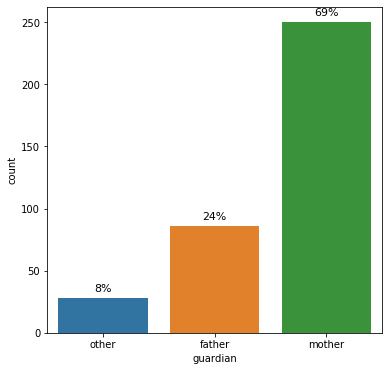

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
11,guardian,nominal,3,31,8.0,364,mother,NaN


In [32]:
categorical_viz('guardian')

The most of students have mothers as guardians. The distribution is far from equal. Let's fill the gaps with most typical value.

In [33]:
fill_miss_with_mode('guardian')

### traveltime

In [34]:
display(stud_math.groupby(['school', 'address']).traveltime.median())

school  address
GP      R          1.0
        U          1.0
MS      R          2.0
        U          2.0
Name: traveltime, dtype: float64

We already paid attention to this column when we explored address. We have 28 null-values.
Let's replace them with median for each school. Notice that there median and mode are the same for both types of addresses but different for each school.

In [35]:
stud_math.loc[(pd.isnull(stud_math['traveltime'])), 'traveltime']\
    = stud_math.school.apply(lambda x: 2 if x == 'MS' else 1)

In [36]:
qa(stud_math, 'traveltime')

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
12,traveltime,ordinal,4,0,0.0,395,1,7.0


### studytime

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


,score
studytime,
1.0,49.466019
2.0,50.820106
3.0,57.777778
4.0,56.296296


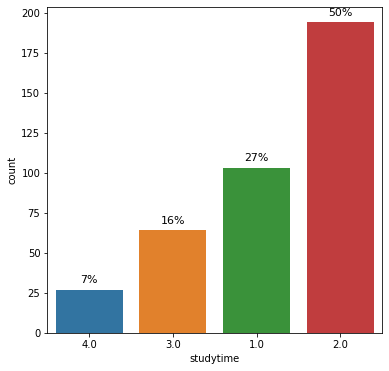

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
13,studytime,ordinal,4,7,2.0,388,2,34.0


In [37]:
categorical_viz('studytime')

There 7 missing values it is not a lot, and as the half of student spent between 2 and 2,5 hours for study except school it is justifiable to use mode = 2 to fulfill the gaps.

In [38]:
fill_miss_with_mode('studytime')

### studytime, granular

There is strange column that even doesn't present in dataset description.
It is suspiciously repeat the previous column 'study'
let's check the connection between them.

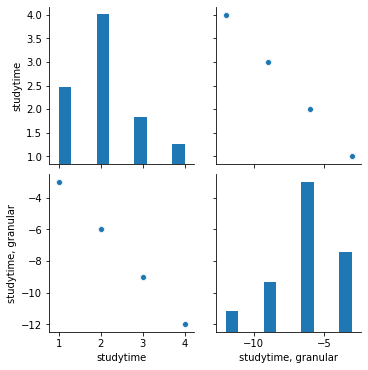

In [39]:
sns.pairplot(stud_math[['studytime', 'studytime, granular']])

It seems to be a strong negative correlation between them.
To be totally sure let's check the correlation:

In [40]:
stud_math[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


So now we have all reasons to drop this feature from dataset. We don't know why it was included to the dataset while it still contains studytime values is multiplied with -3.

In [41]:
stud_math.drop(['studytime, granular'], inplace=True, axis=1)
ordinal.remove('studytime, granular')

### failures

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


,score
failures,
0.0,56.051724
1.0,40.000000
2.0,32.333333
3.0,29.642857


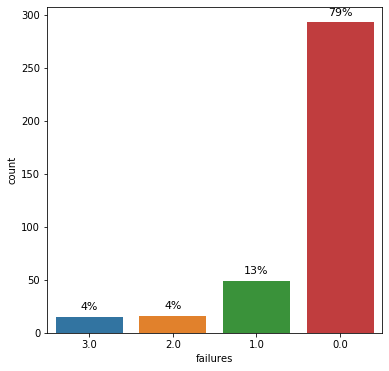

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
14,failures,ordinal,4,22,6.0,373,0,102.0


In [42]:
categorical_viz('failures')

There are 22 na-values. Suppose that na-values are 'hidden' 0 and that data collectors just didn't filled the zeros. So let's use the value 0 as the value to fulfill gaps. it is also justifiable as the most popular value.


In [43]:
fill_miss_with_mode('failures')

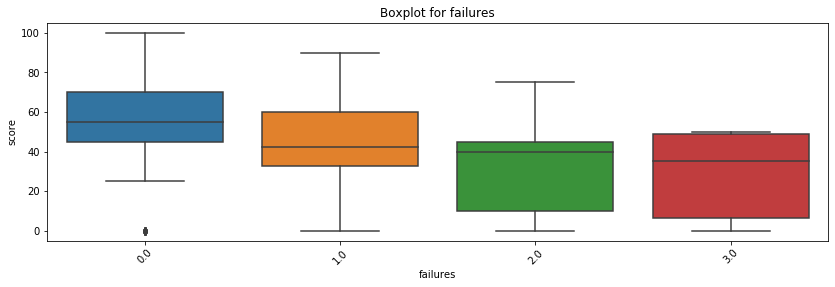

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
14,failures,ordinal,4,0,0.0,395,0,80.0


In [44]:
get_boxplot('failures')
qa(stud_math, 'failures')

After looking at boxplotes we see that the less failures students had the better they perform.
It is actually not surprise that good students perform good in different disciplines.
There number of outliers are other values that unequal with 0. It is only because the share of 0 values is very big and other values are counted as very untypical.
So we are not going to drop these values. 

### schoolsup

As school support depends on school let's look at the distribution of this feature in each school.

In [45]:
display(stud_math.groupby(['school', 'schoolsup']).schoolsup.count())

school  schoolsup
GP      no           291
        yes           51
MS      no            44
Name: schoolsup, dtype: int64

,schoolsup
no,335
yes,51
NaN,9


,score
schoolsup,
no,53.126888
yes,47.040816


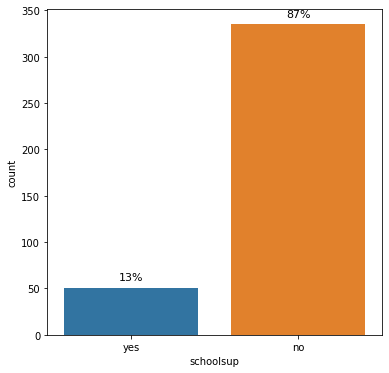

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
15,schoolsup,nominal,2,9,2.0,386,no,NaN


In [46]:
categorical_viz('schoolsup')

We see that MS school doesn't have this option at all and as for GP there a few who get the support. There a only 7 na-values. Let's fill them with 'no'

In [47]:
fill_miss_with_mode('schoolsup')

### famsup

,famsup
yes,219
no,137
NaN,39


,score
famsup,
no,52.074074
yes,51.712963


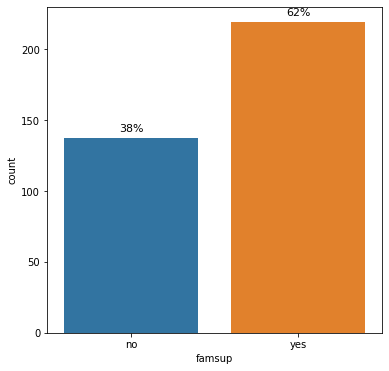

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
16,famsup,nominal,2,39,10.0,356,yes,NaN


In [48]:
categorical_viz('famsup')

The feature famsup has many na-values so try to fill it using other features.
I can suppose connection of family support with the following feature:
1. Fedu and Medu - parents with low level can't help their children
2. Paid - if parents pay maybe they don't have possibility to help or they just have no need
3. Fsize
4. Pstatus
let's check this guesses.

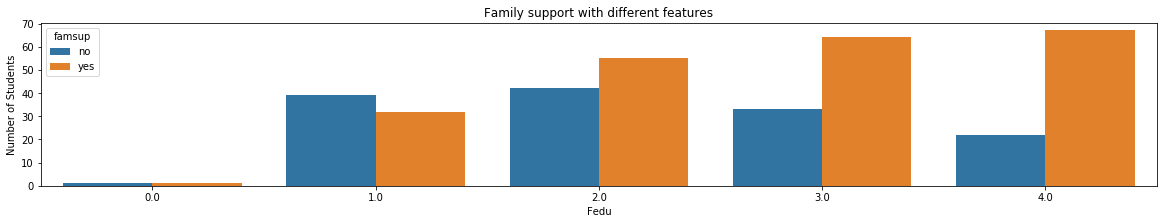

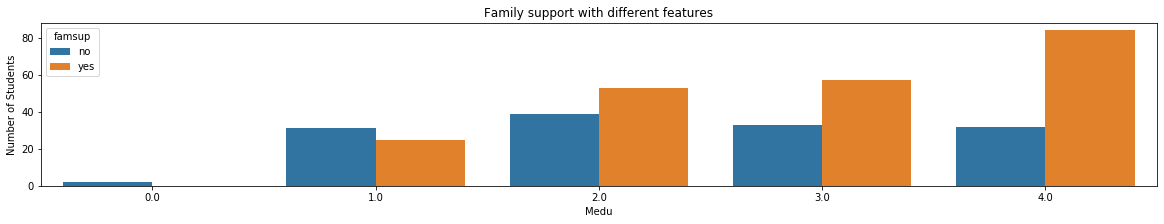

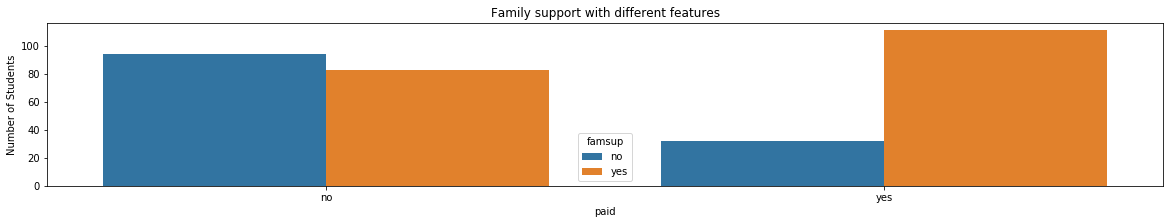

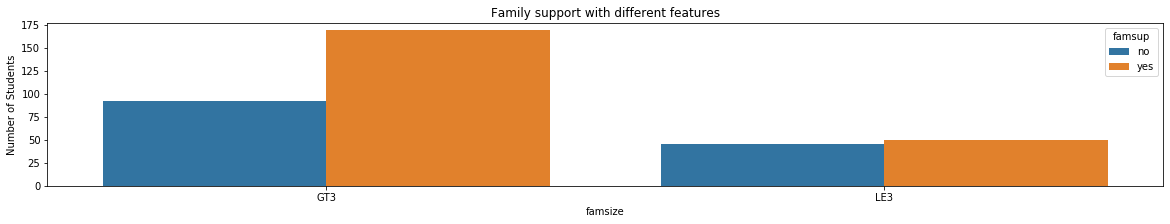

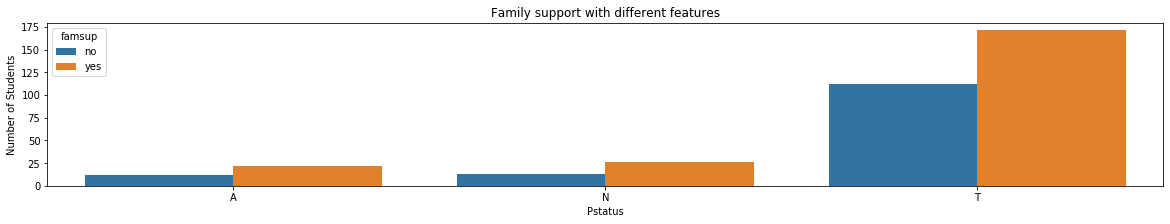

In [49]:
for x in ['Fedu', 'Medu', 'paid', 'famsize', 'Pstatus']:

    plt.figure(figsize=(20, 3))
    d = sns.countplot(stud_math[x], hue=stud_math['famsup'])
    d.set_title("Family support with different features")
    d.set_xlabel(x)
    d.set_ylabel("Number of Students")

Guesses 1-2 were right and 3-4 are not. But switch the features and make another groupby.

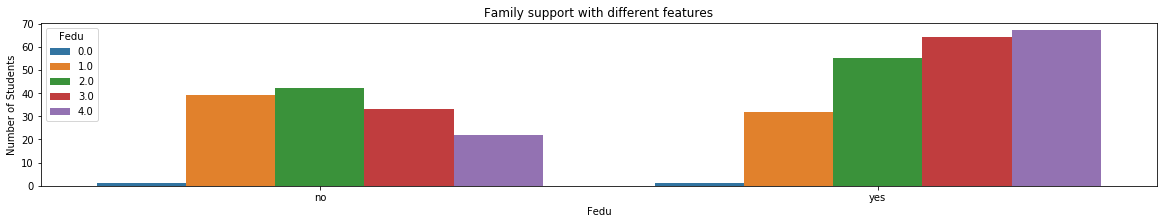

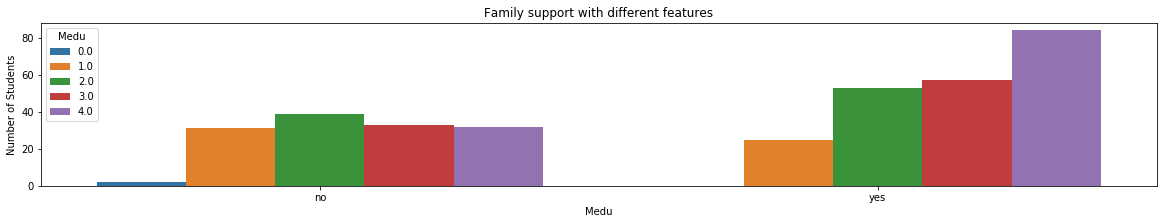

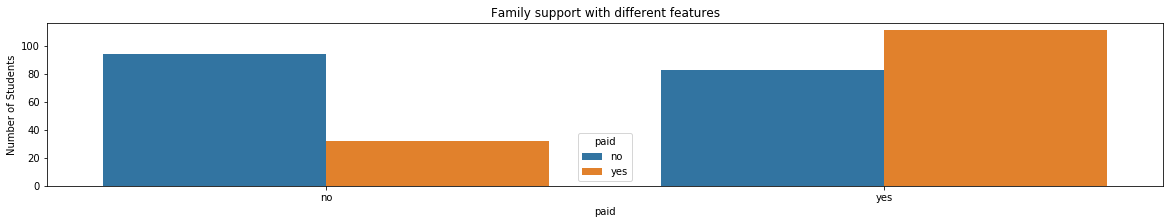

In [50]:
for x in ['Fedu', 'Medu', 'paid']:

    plt.figure(figsize=(20, 3))
    d = sns.countplot(stud_math['famsup'], hue=stud_math[x])
    d.set_title("Family support with different features")
    d.set_xlabel(x)
    d.set_ylabel("Number of Students")

So the higher education the more probable that there is family support.
But the theory with paid classes is wrong because parents who support prefer they children to have paid classes.
So use this rule to fulfill gaps:

1.If Medu+Fedu <= 3 then 'NO'

2. If one of parents has highest level or 3 then 'yes'


In [51]:
stud_math.loc[(pd.isnull(stud_math['famsup'])) &
              ((stud_math.Fedu+stud_math.Medu) <= 3), 'famsup'] = 'no'
stud_math.loc[(pd.isnull(stud_math['famsup'])) &
              ((stud_math.Fedu+stud_math.Medu) >= 5), 'famsup'] = 'yes'

And now we have only 3. Both parents with middle levels. let's fill them with 'no'. 

In [52]:
stud_math[stud_math.famsup.isnull()][['paid', 'famsup', 'Medu',
                                      'Fedu', 'Mjob', 'Fjob']]

,paid,famsup,Medu,Fedu,Mjob,Fjob
40,no,NaN,2.0,2.0,other,other
195,no,NaN,2.0,2.0,services,services
327,no,NaN,2.0,2.0,services,other


In [53]:
stud_math.loc[(pd.isnull(stud_math['famsup'])), 'famsup'] = 'no'

### paid

,paid
no,200
yes,155
NaN,40


,score
paid,
no,50.35533
yes,55.00000


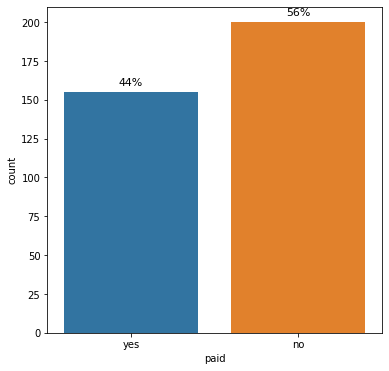

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
17,paid,nominal,2,40,10.0,355,no,NaN


In [54]:
categorical_viz('paid')

There are also many null values. Let's look connections with some family conditions.

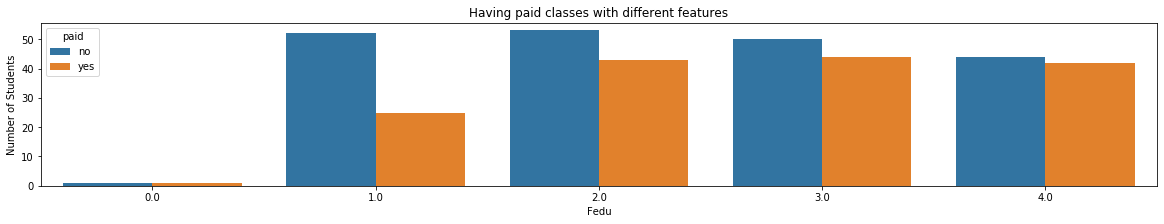

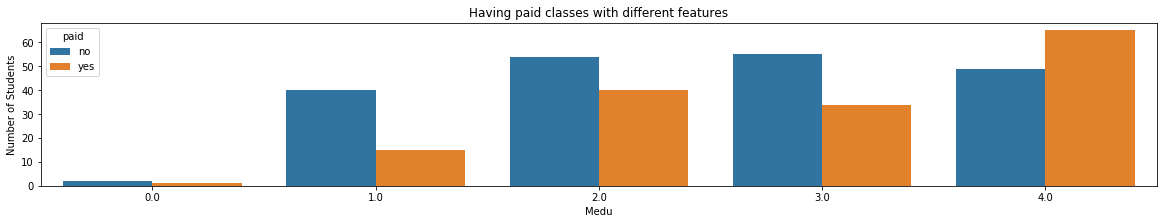

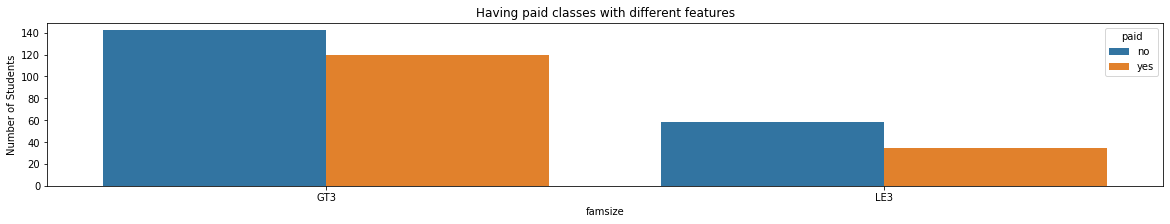

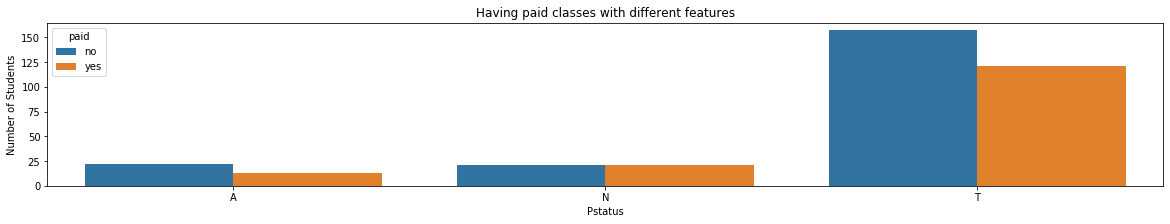

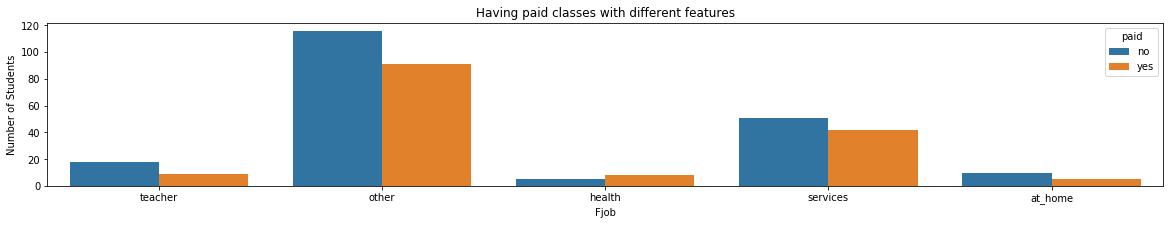

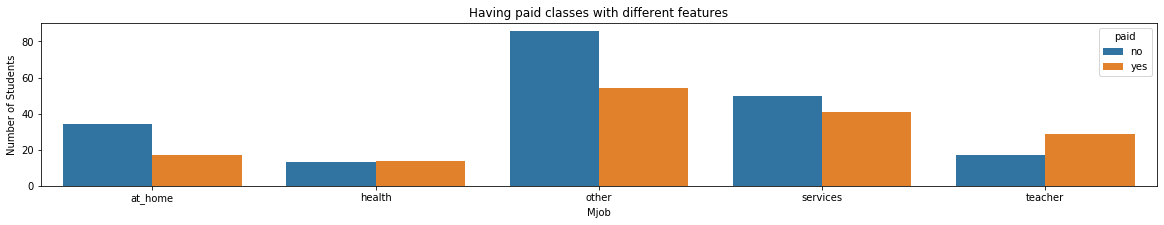

In [55]:
for x in ['Fedu', 'Medu', 'famsize', 'Pstatus', 'Fjob', 'Mjob']:

    plt.figure(figsize=(20, 3))
    d = sns.countplot(stud_math[x], hue=stud_math['paid'])
    d.set_title("Having paid classes with different features")
    d.set_xlabel(x)
    d.set_ylabel("Number of Students")

Very interesting. When children more likely have paid classes?
1. When mother is a teacher
2. When mother has highest education
And it is not the same for fathers.
So use this info to fill the gaps.

In [56]:
stud_math.loc[(pd.isnull(stud_math['paid'])) &
              ((stud_math.Medu) == 4), 'paid'] = 'yes'

In [57]:
stud_math[stud_math.paid.isnull()][['paid', 'famsup', 'Medu',
                                    'Fedu', 'Mjob', 'Fjob']]
qa(stud_math, 'paid')

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
17,paid,nominal,2,23,6.0,372,no,NaN


Still many null values. Let's replace them with third value = no_info

In [58]:
fill_miss_with_value('paid', 'no_info')

In [59]:
qa(stud_math, 'paid')

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
17,paid,nominal,3,0,0.0,395,no,NaN


### activities

,activities
yes,195
no,186
NaN,14


,score
activities,
no,52.185792
yes,52.682292


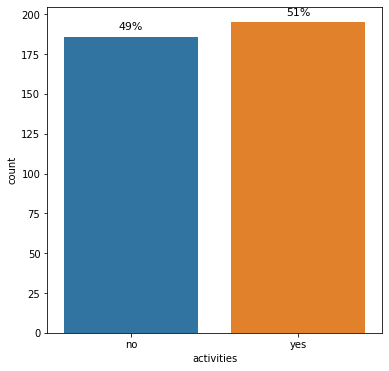

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
18,activities,nominal,2,14,4.0,381,yes,NaN


In [60]:
categorical_viz('activities')

Let's fill the gaps with mode. The distribution is very equal.

In [61]:
fill_miss_with_mode('activities')

### nursery

,nursery
yes,300
no,79
NaN,16


,score
nursery,
no,50.000000
yes,52.962963


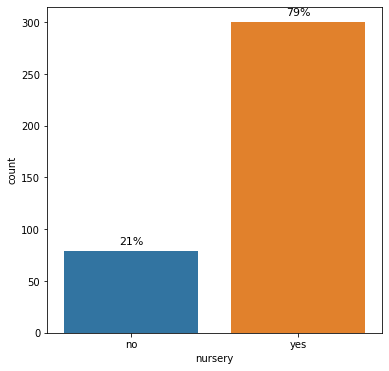

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
19,nursery,nominal,2,16,4.0,379,yes,NaN


In [62]:
categorical_viz('nursery')

Let's fill the gaps with mode. The distribution is very equal.

In [63]:
fill_miss_with_mode('nursery')

### higher

,higher
yes,356
NaN,20
no,19


,score
higher,
no,33.684211
yes,53.100000


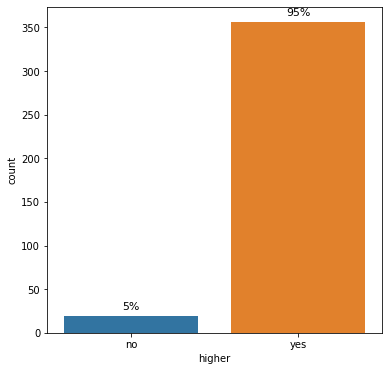

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
20,higher,nominal,2,20,5.0,375,yes,NaN


In [64]:
categorical_viz('higher')

There are many misses but so many people has a wish to get high education, that it has a sence to replace with mode

In [65]:
fill_miss_with_mode('higher')

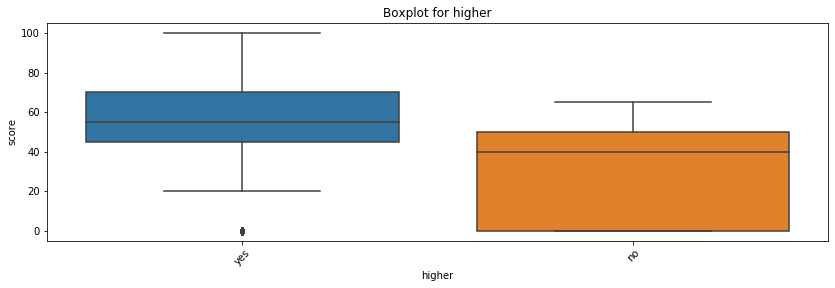

In [66]:
get_boxplot('higher')

As expected people with ambitions have a better score.

### internet

,internet
yes,305
no,56
NaN,34


,score
internet,
no,49.090909
yes,53.116667


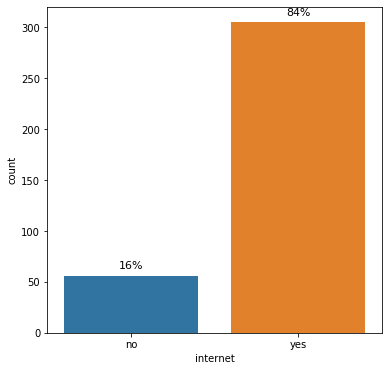

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
21,internet,nominal,2,34,9.0,361,yes,NaN


In [67]:
categorical_viz('internet')

Also fill with mode.

In [68]:
fill_miss_with_mode('internet')

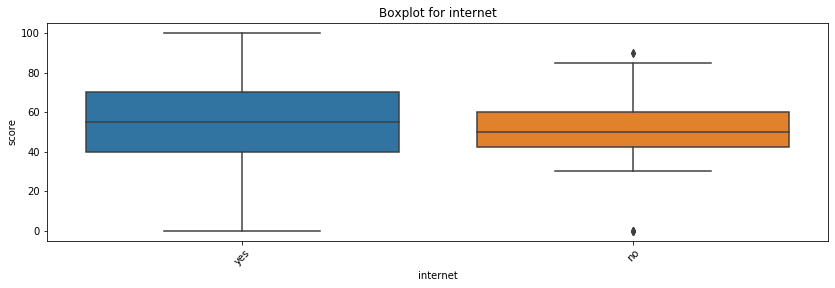

In [69]:
get_boxplot('internet')

### romantic

,romantic
no,240
yes,124
NaN,31


,score
romantic,
no,54.574468
yes,47.682927


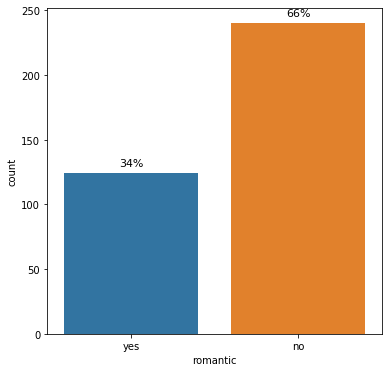

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
22,romantic,nominal,2,31,8.0,364,no,NaN


In [70]:
categorical_viz('romantic')
fill_miss_with_value('romantic', 'no_info')

This column has many null values. At first there is no idea how to handle with it. So look at boxplot just to understand whether it worth any exploration.

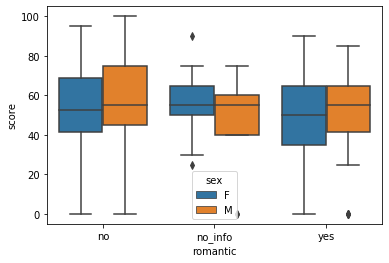

In [71]:
sns.boxplot(x='romantic', y='score', data=stud_math, hue='sex')

We see that people in romantic of both genders perform worse.
And the median value for male is the same and as for female it is better for those who are not in relation.
We suspect that this column will be useful and leave misses filled with 'no_info'

### famrel


,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


,score
famrel,
-1.0,40.000000
1.0,55.000000
2.0,48.529412
3.0,51.451613
4.0,51.573034
5.0,54.896907


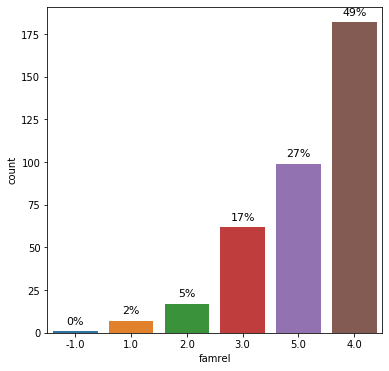

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
23,famrel,ordinal,6,27,7.0,368,4,52.0


In [72]:
categorical_viz('famrel')

The most of students have good relations. There are one incorrect value = -1. Replace it with 1.
Other of them we cam replace with mode.

In [73]:
stud_math.loc[stud_math['famrel'] == -1, 'Fedu'] = 1
fill_miss_with_mode('famrel')

### freetime


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


,score
freetime,
1.0,48.333333
2.0,57.539683
3.0,48.947368
4.0,52.636364
5.0,56.351351


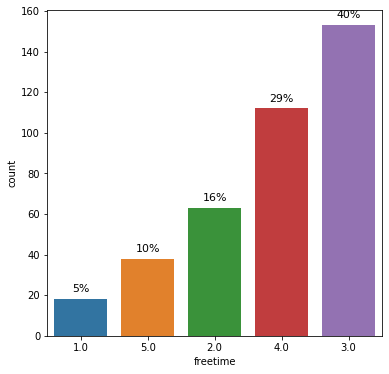

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
24,freetime,ordinal,5,11,3.0,384,3,29.0


In [74]:
categorical_viz('freetime')

Let's fill the misses with mode. The most of students have average amount of free time. And it seems not to correlate with the target score.

In [75]:
fill_miss_with_mode('freetime')

### goout

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


,score
goout,
1.0,49.347826
2.0,55.990099
3.0,55.158730
4.0,49.506173
5.0,44.509804


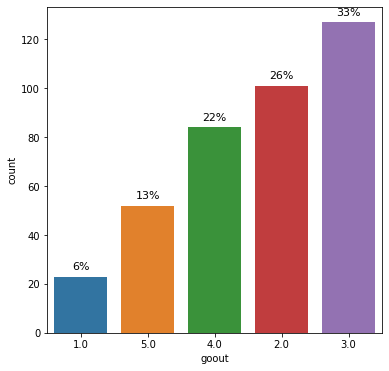

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
25,goout,ordinal,5,8,2.0,387,3,8.0


In [76]:
categorical_viz('goout')

The most of students have medium value of time to go out with friends. Only 8 misses that can be filled with mode.

In [77]:
fill_miss_with_mode('goout')

### health

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


,score
health,
1.0,59.361702
2.0,52.619048
3.0,50.625000
4.0,50.833333
5.0,52.189781


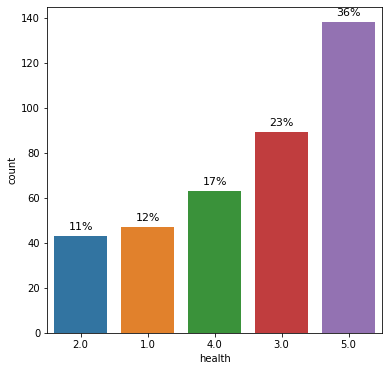

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
26,health,ordinal,5,15,4.0,380,5,15.0


In [78]:
categorical_viz('health')

The most of students have good health. The misses can be filled with mode.

In [79]:
fill_miss_with_mode('health')

### absences

Absences is quantitative feature. So let's look at the distribution at first.

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
27,absences,quantitative,36,12,3.0,383,4,29.0


mode:  0    0.0
dtype: float64


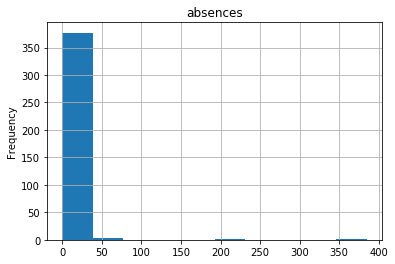

In [80]:
stud_math['absences'].plot(kind='hist', grid=True, title='absences')
display(qa(stud_math, 'absences'))
print('mode: ', stud_math.absences.mode())

According to the distrubution histogram and table there 29 outliers. let's look at non null outliers.

In [81]:
pd.DataFrame(outliers_search('absences', num_only=0,
                             df=stud_math[['absences']]
                             [~stud_math.absences.isnull()])).absences.sort_values()

260     21.0
313     22.0
277     22.0
216     22.0
320     23.0
198     24.0
40      25.0
103     26.0
205     28.0
280     30.0
307     38.0
315     40.0
74      54.0
183     56.0
276     75.0
390    212.0
222    385.0
Name: absences, dtype: float64

We have 29 outliers to handle with:
1. two extremely big value 212 and 385 - replace them with the median = 4
2. 12 null values : also replace with median
3. values that are between 20 and 40 - leave them. The amount of them is 12. So it is not outstanding.
4. three values between 54 and 75. As soon as they are only three - replace them with the median = 4

In [82]:
stud_math.loc[stud_math.absences >= 54, 'absences'] = 4
stud_math.loc[stud_math.absences.isnull(), 'absences'] = 4

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
27,absences,quantitative,31,0,0.0,395,4,12.0


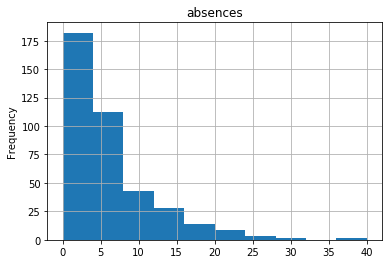

In [83]:
stud_math['absences'].plot(kind='hist', grid=True, title='absences')
display(qa(stud_math, 'absences'))

Now the distribution looks much better and offsets to left. The majority of students prefer not to miss classes.

### score

In [84]:
qa(stud_math, 'score')

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
28,score,quantitative,18,6,2.0,389,55,6.0


And finally our target variable - score. It has only 6 null values and outliers.
During the previous exploration we tried not to drop values to save as much data as possible.
But when it concerns target variable we think it is better to drop it. after that look at distribution.

In [85]:
stud_math.dropna(subset=['score'], inplace=True)

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
28,score,quantitative,18,0,0.0,389,55,0.0


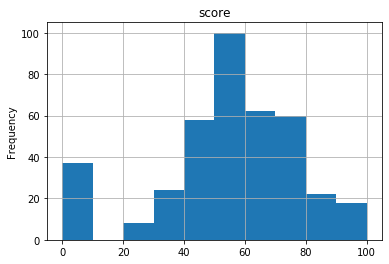

In [86]:
stud_math['score'].plot(kind='hist', grid=True, title='score')
display(qa(stud_math, 'score'))

The scale of exam grading probably has 100 points as a maximum. The distribution looks like normal except zero-values. Zero-values are not counted as outliers.
Zero grade maybe means that student didn't attend the examination or was disqualified.
The amount is too big and zero-grade also gives us information, though we don't know the exact reason.

Summary for part 2.

1. Only 6 objects were excluded - because of na-values in target values


2. 1 Column was dropped because of correlation with another one. (studytime,granular is dropped)

3. Missing values in other columns are fulfilled with simple methods (mode or median, mode or median in classes, grouped by relational features, adding extra value) without dropping them.


4. Incorrect values that contradicts dataset description and logics are replaced.


5. There are some values that statistics counts as outliers but they don't contradict the common sense and dataset description. 


6. Other outliers are replaced


7. Finally we have explored all features, got rid of null values and outliers where it was reasonable. Look at the table that gives as information about dataset in it's current condition and go further to the next part.

In [87]:
qa(stud_math)

,feature,type,unique_value,null_value,null_value_percent,non_null_value,mode_or_median,outliers_num
0,school,nominal,2,0,0.0,389,GP,NaN
1,sex,nominal,2,0,0.0,389,F,NaN
2,age,quantitative,8,0,0.0,389,17,1.0
3,address,nominal,2,0,0.0,389,U,NaN
4,famsize,nominal,2,0,0.0,389,GT3,NaN
5,Pstatus,nominal,3,0,0.0,389,T,NaN
6,Medu,ordinal,5,0,0.0,389,4,0.0
7,Fedu,ordinal,5,0,0.0,389,2,0.0
8,Mjob,nominal,5,0,0.0,389,other,NaN
9,Fjob,nominal,5,0,0.0,389,other,NaN


## Part 3.  Correlation analysis of quantitative variables
<a id='label7'></a>

We have 3 quantitative variables: age, absences and score. Let's look the correlation between them and build the heatmap.

,age,absences,score
age,1.000000,0.188844,-0.155726
absences,0.188844,1.000000,0.054484
score,-0.155726,0.054484,1.000000


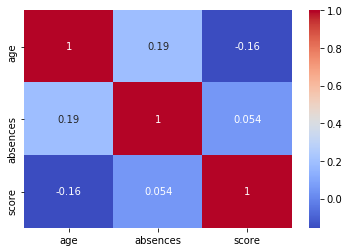

In [88]:
display(stud_math[['age', 'absences', 'score']].corr())
sns.heatmap(stud_math[['age', 'absences', 'score']
                      ].corr(), annot=True, cmap='coolwarm')

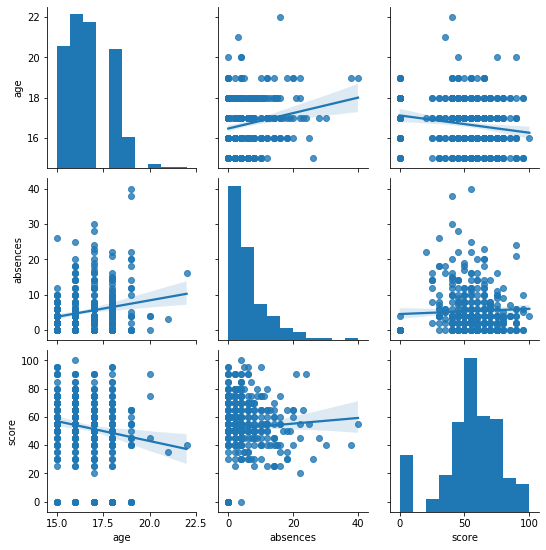

In [89]:
sns.pairplot(stud_math[['age', 'absences', 'score']], kind='reg')

Summary for part 3. Conclusion is that score is poorly correlated with age and absences.
It has positive correlation with absences. It is very strange and unexpected but the correlation is very low. And the correlation with age is negative. 
We take 'age' to final dataset for model.

In [101]:
stat_dif_list = ['score', 'age']

## Part 4.  Categorical variables analysis
<a id='label8'></a>

On this stage we look at categorical feature influence. We use boxplotes for this.
We do it at first for nominal variables.
After that we choose statistically significant columns with student test. Take t-value = 0.05.

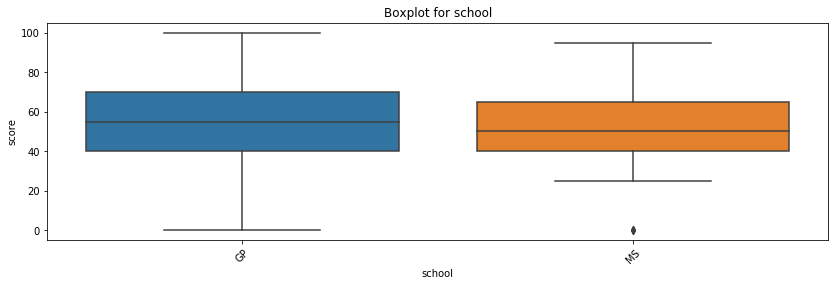

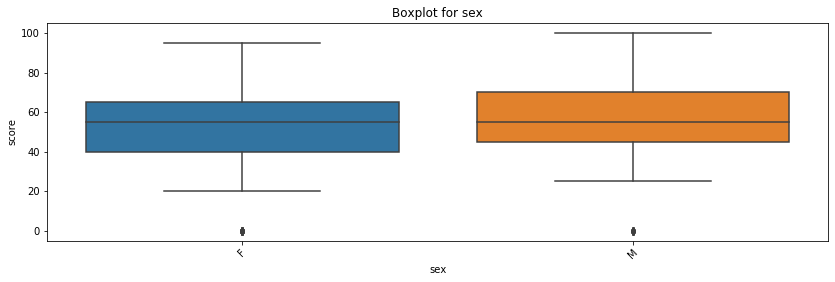

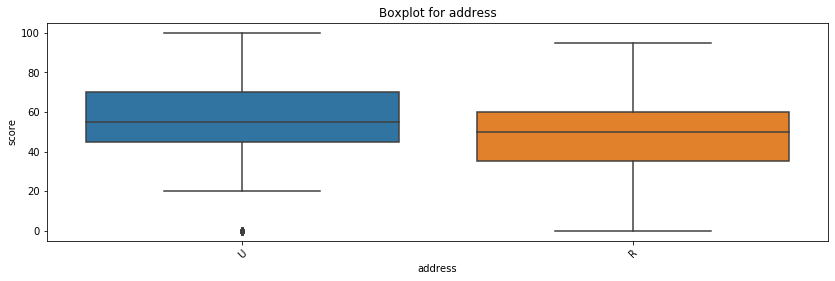

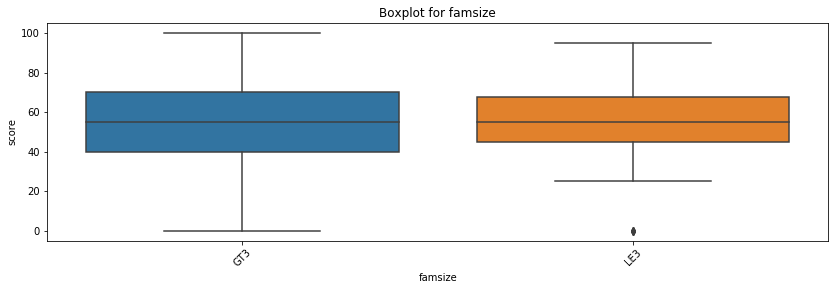

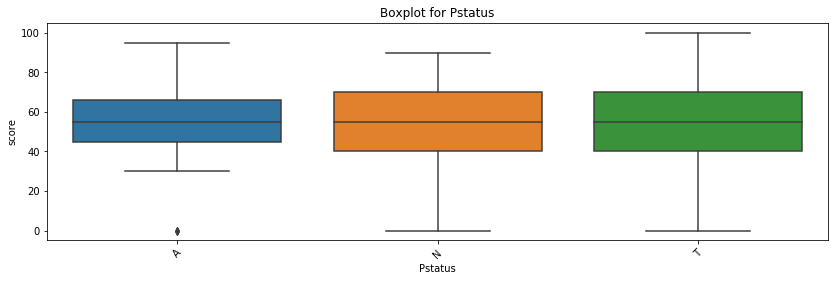

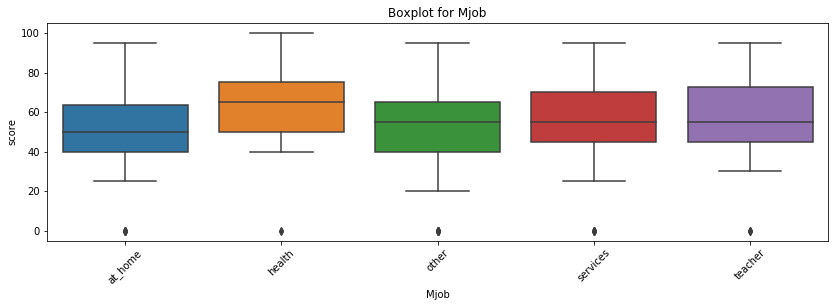

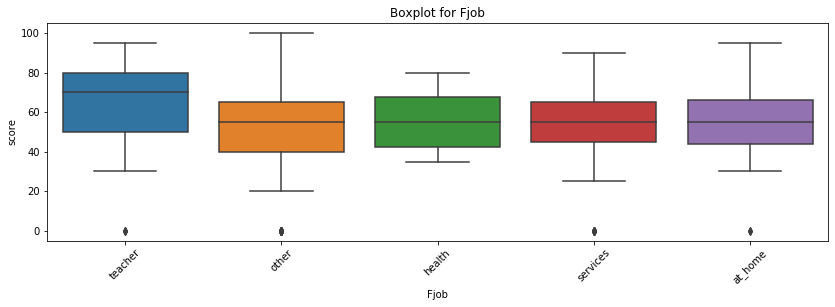

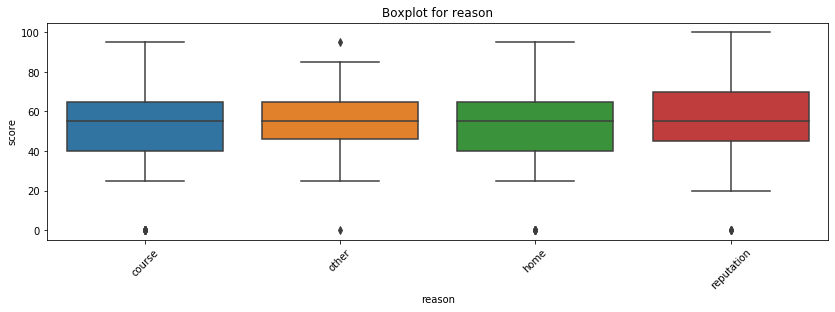

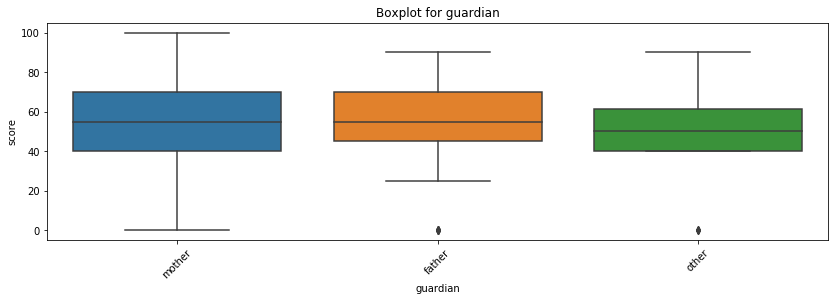

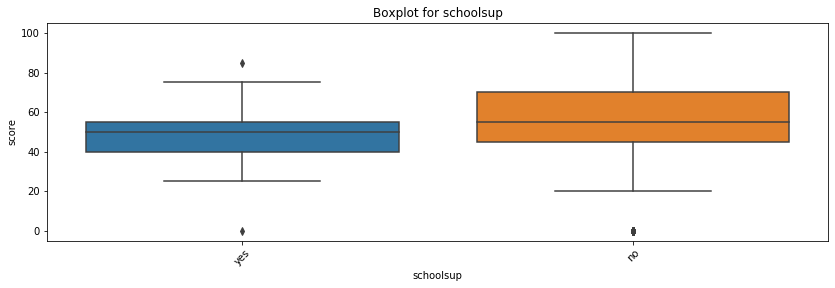

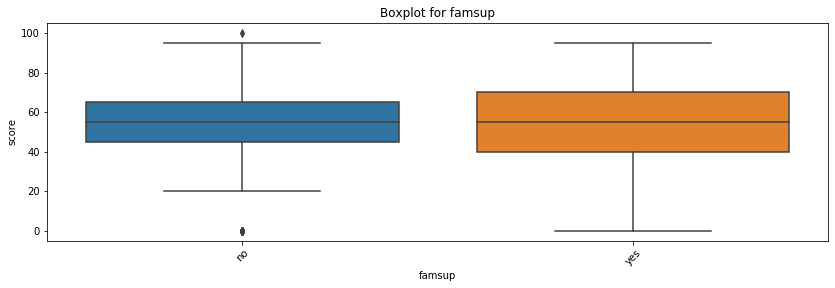

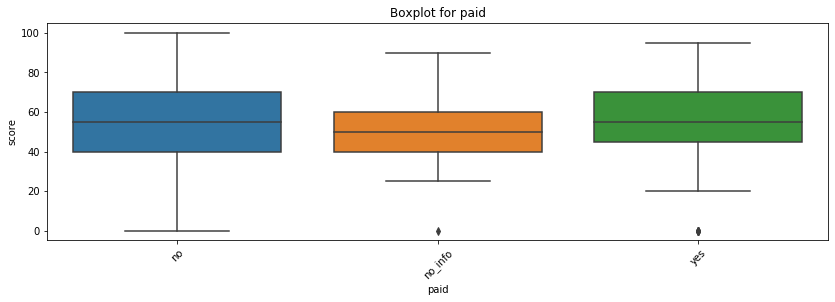

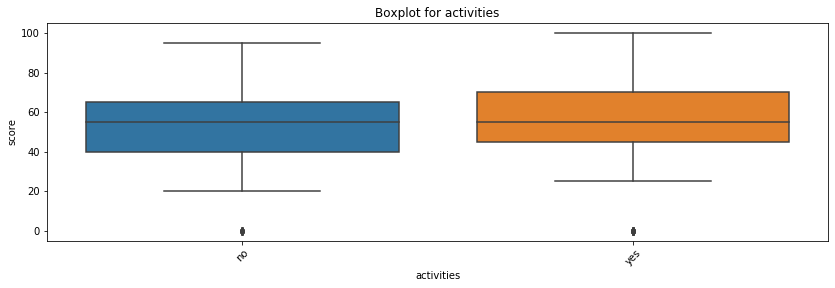

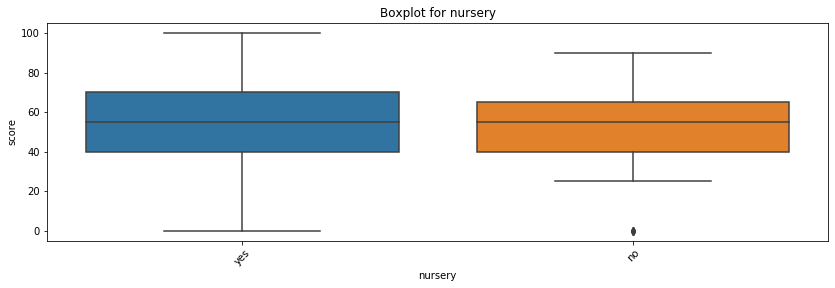

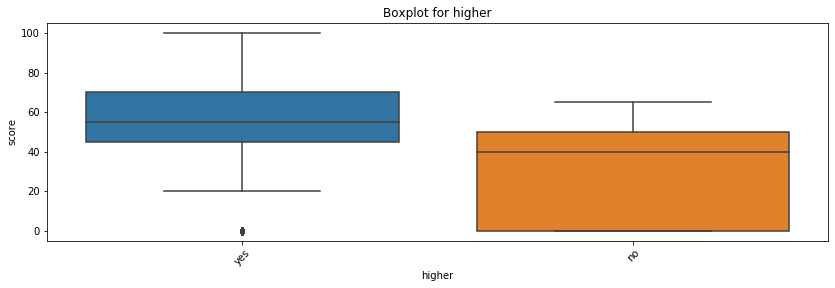

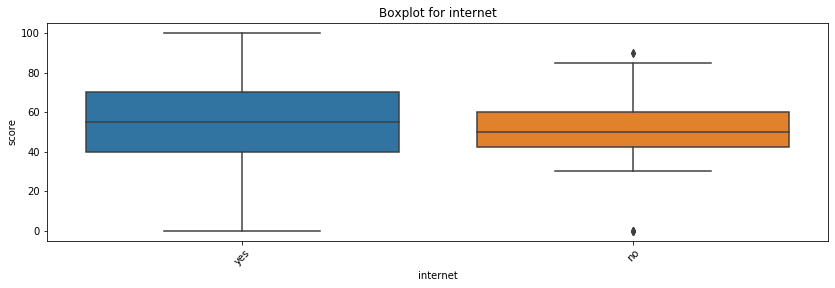

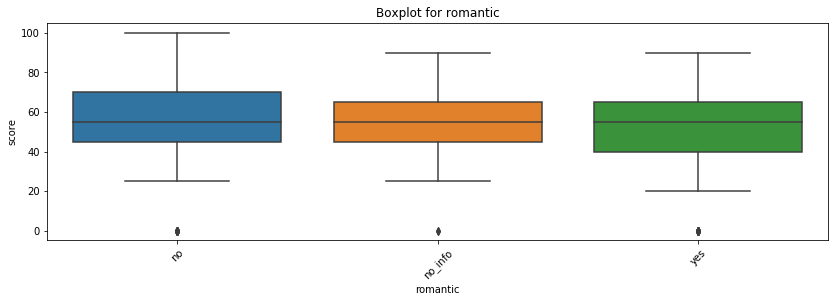

In [92]:
for x in nominal:
    get_boxplot(x)

In [102]:
for x in nominal:
    if get_stat_dif(x) != None:
        stat_dif_list.append(get_stat_dif(x))
        print('Found statistically significant columns', x)

Found statistically significant columns address
Found statistically significant columns Mjob
Found statistically significant columns higher
Found statistically significant columns romantic


The same analysis for ordinal values.

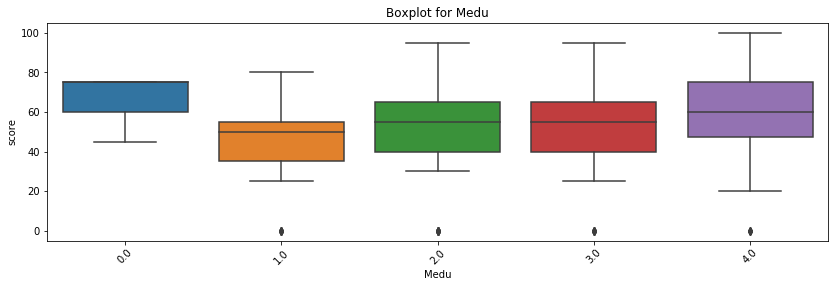

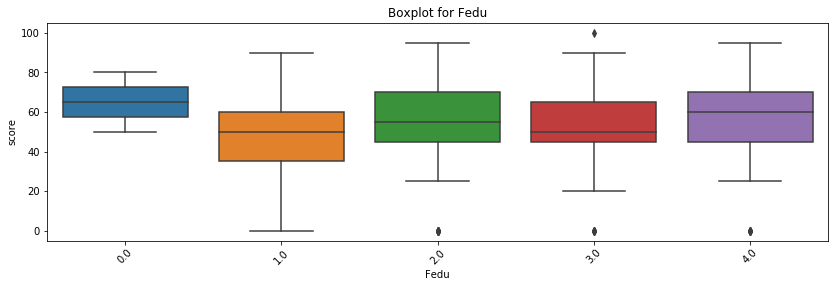

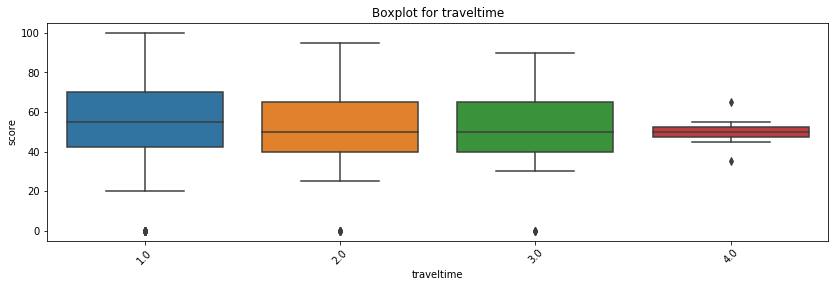

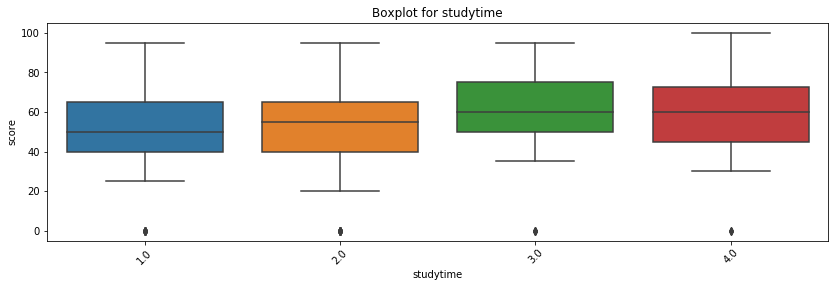

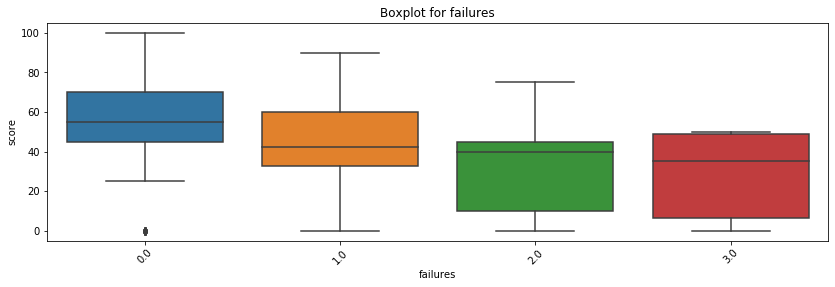

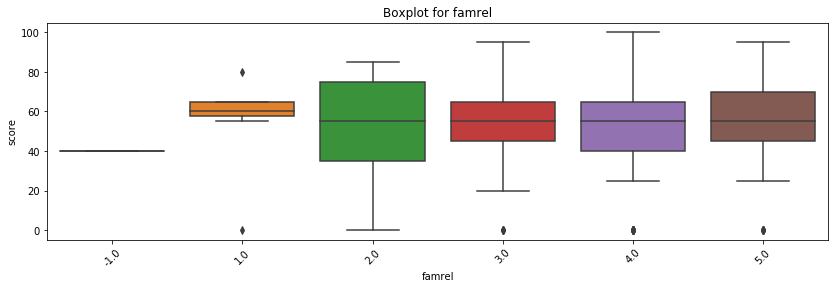

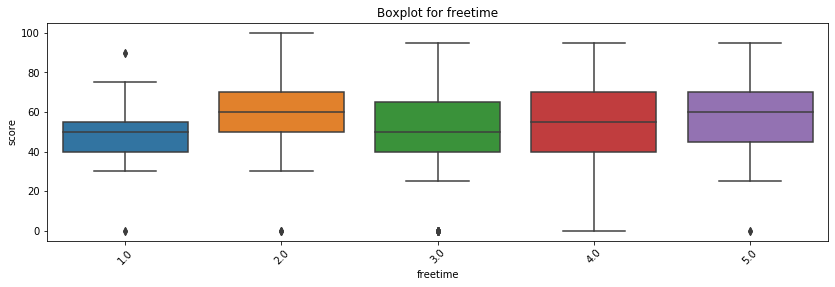

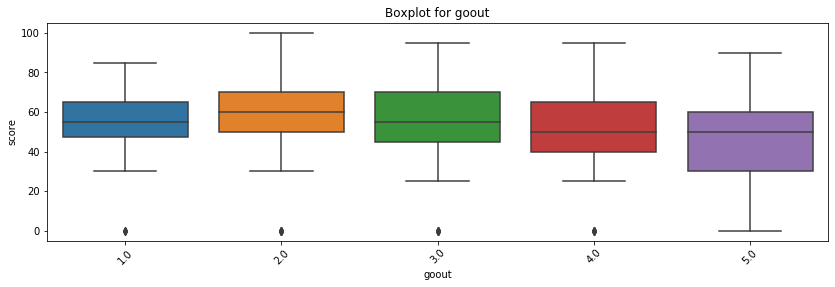

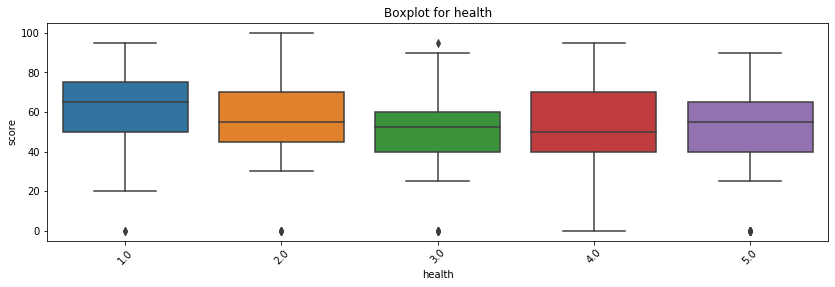

In [94]:
for x in ordinal:
    get_boxplot(x)

In [103]:
for x in ordinal:
    if get_stat_dif(x) != None:
        stat_dif_list.append(get_stat_dif(x))
        print('Found statistically significant columns', x)

Found statistically significant columns Medu
Found statistically significant columns Fedu
Found statistically significant columns failures


In [104]:
print('Statistically significant variables:', ', '.join(stat_dif_list))

Statistically significant variables: score, age, address, Mjob, higher, romantic, Medu, Fedu, failures


Summary for part 4.

We take only 7 categorical features: Mjob, higher, romantic, Medu, Fedu, failures.
Looking at boxplotes features goout and sex have influence. But they are not statistically significant according to student test with t-value 0.05.


## Part 5.  Conclusion
<a id='label9'></a>


Let's look at the head of final dataset and it's heatmap.

In [97]:
stud_math_for_model = stud_math.loc[:, stat_dif_list]
stud_math_for_model.head()

,score,age,address,Mjob,higher,romantic,Medu,Fedu,failures
0,30.0,18,U,at_home,yes,no,4.0,4.0,0.0
1,30.0,17,U,at_home,yes,no,1.0,1.0,0.0
2,50.0,15,U,at_home,yes,no_info,1.0,1.0,3.0
3,75.0,15,U,health,yes,yes,4.0,2.0,0.0
4,50.0,16,U,other,yes,no,3.0,3.0,0.0


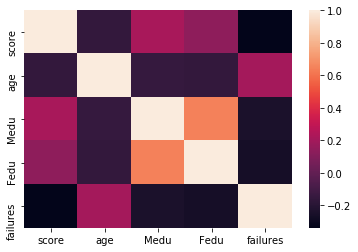

In [98]:
sns.heatmap(stud_math_for_model.corr())

1. The quality of source dataset is satisfiable. Almost all columns except 3 has na-values and outliers, but not a lot(10-11% in most cases). Data mostly collected well.


2. The sample of students in this dataset are rather poor and the distribution of many features has offsets.


3. 1 feature was excluded because of strong correlation and 6 objects were excluded because of na-value in target score.


4. Dataset was cleaned of missing values and outliers.


5. The most significant features that are recommended for model: score, age, address, Mjob, higher, romantic, Medu, Fedu, failures


6. The higher parents education and students ambitions the higher grade.


7. Maybe it has a sense to explore separately students who has 0-grade and more-than-0-grade, because the reasons for having 0 are different and we don't know them.

